In [1]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
task_name = 'approach'
    
# Create directory if it does not exist
if not os.path.exists(str(task_name)):
    os.makedirs(str(task_name))


# read in the csv file
df_all_tasks = pd.read_csv('all_feats_all_tasks_non_slimmed.csv')

def Get_Features_And_Targets(task_name):
    '''Input: task_name
        Output: Features and Targets'''
    
    if task_name == 'approach':
        # select columns that do not have 'bubbles' or 'vad' in the feature name
        cols_to_keep = [col for col in df_all_tasks.columns if 'bubbles' not in col and 'vad' not in col and 'childid' not in col]
        df_task = df_all_tasks[cols_to_keep] 

    if task_name == 'speech':
        # select speech columns
        cols_to_keep = ['index'] + ['total_prop']
        cols_to_keep = cols_to_keep + [x for x in list(df_all_tasks.columns) if 'vad' in x]
        cols_to_keep = cols_to_keep 
        df_task = df_all_tasks[cols_to_keep]

    if task_name == 'bubbles':
        # select bubbles columns
        cols_to_keep = ['index'] + ['total_prop']
        cols_to_keep = cols_to_keep + [x for x in list(df_all_tasks.columns) if 'bubbles' in x]
        cols_to_keep = cols_to_keep  
        df_task = df_all_tasks[cols_to_keep]

    if task_name == 'all':
        cols_to_keep = [col for col in df_all_tasks.columns if 'childid' not in col]
        df_task = df_all_tasks[cols_to_keep]


    # set first column as index
    df_task.set_index(df_task.columns[0], inplace=True)
    df_task.rename_axis('index', inplace=True)

    # write to csv
    df_task.to_csv(str(task_name)+'/task_data.csv')

    # read in the csv file
    df_target = pd.read_csv('target_information.csv')

    # set first column as index
    df_target.set_index(df_target.columns[0], inplace=True)
    df_target.rename_axis('index', inplace=True)


    # features drop first and last columns
    features = df_task #.iloc[:, 1:-1]

    # targets columns are 5 through 12
    targets = df_target[['depdxever', 'anxdxever', 'adhddxever']]

    return features, targets



In [3]:
features, targets = Get_Features_And_Targets(task_name)




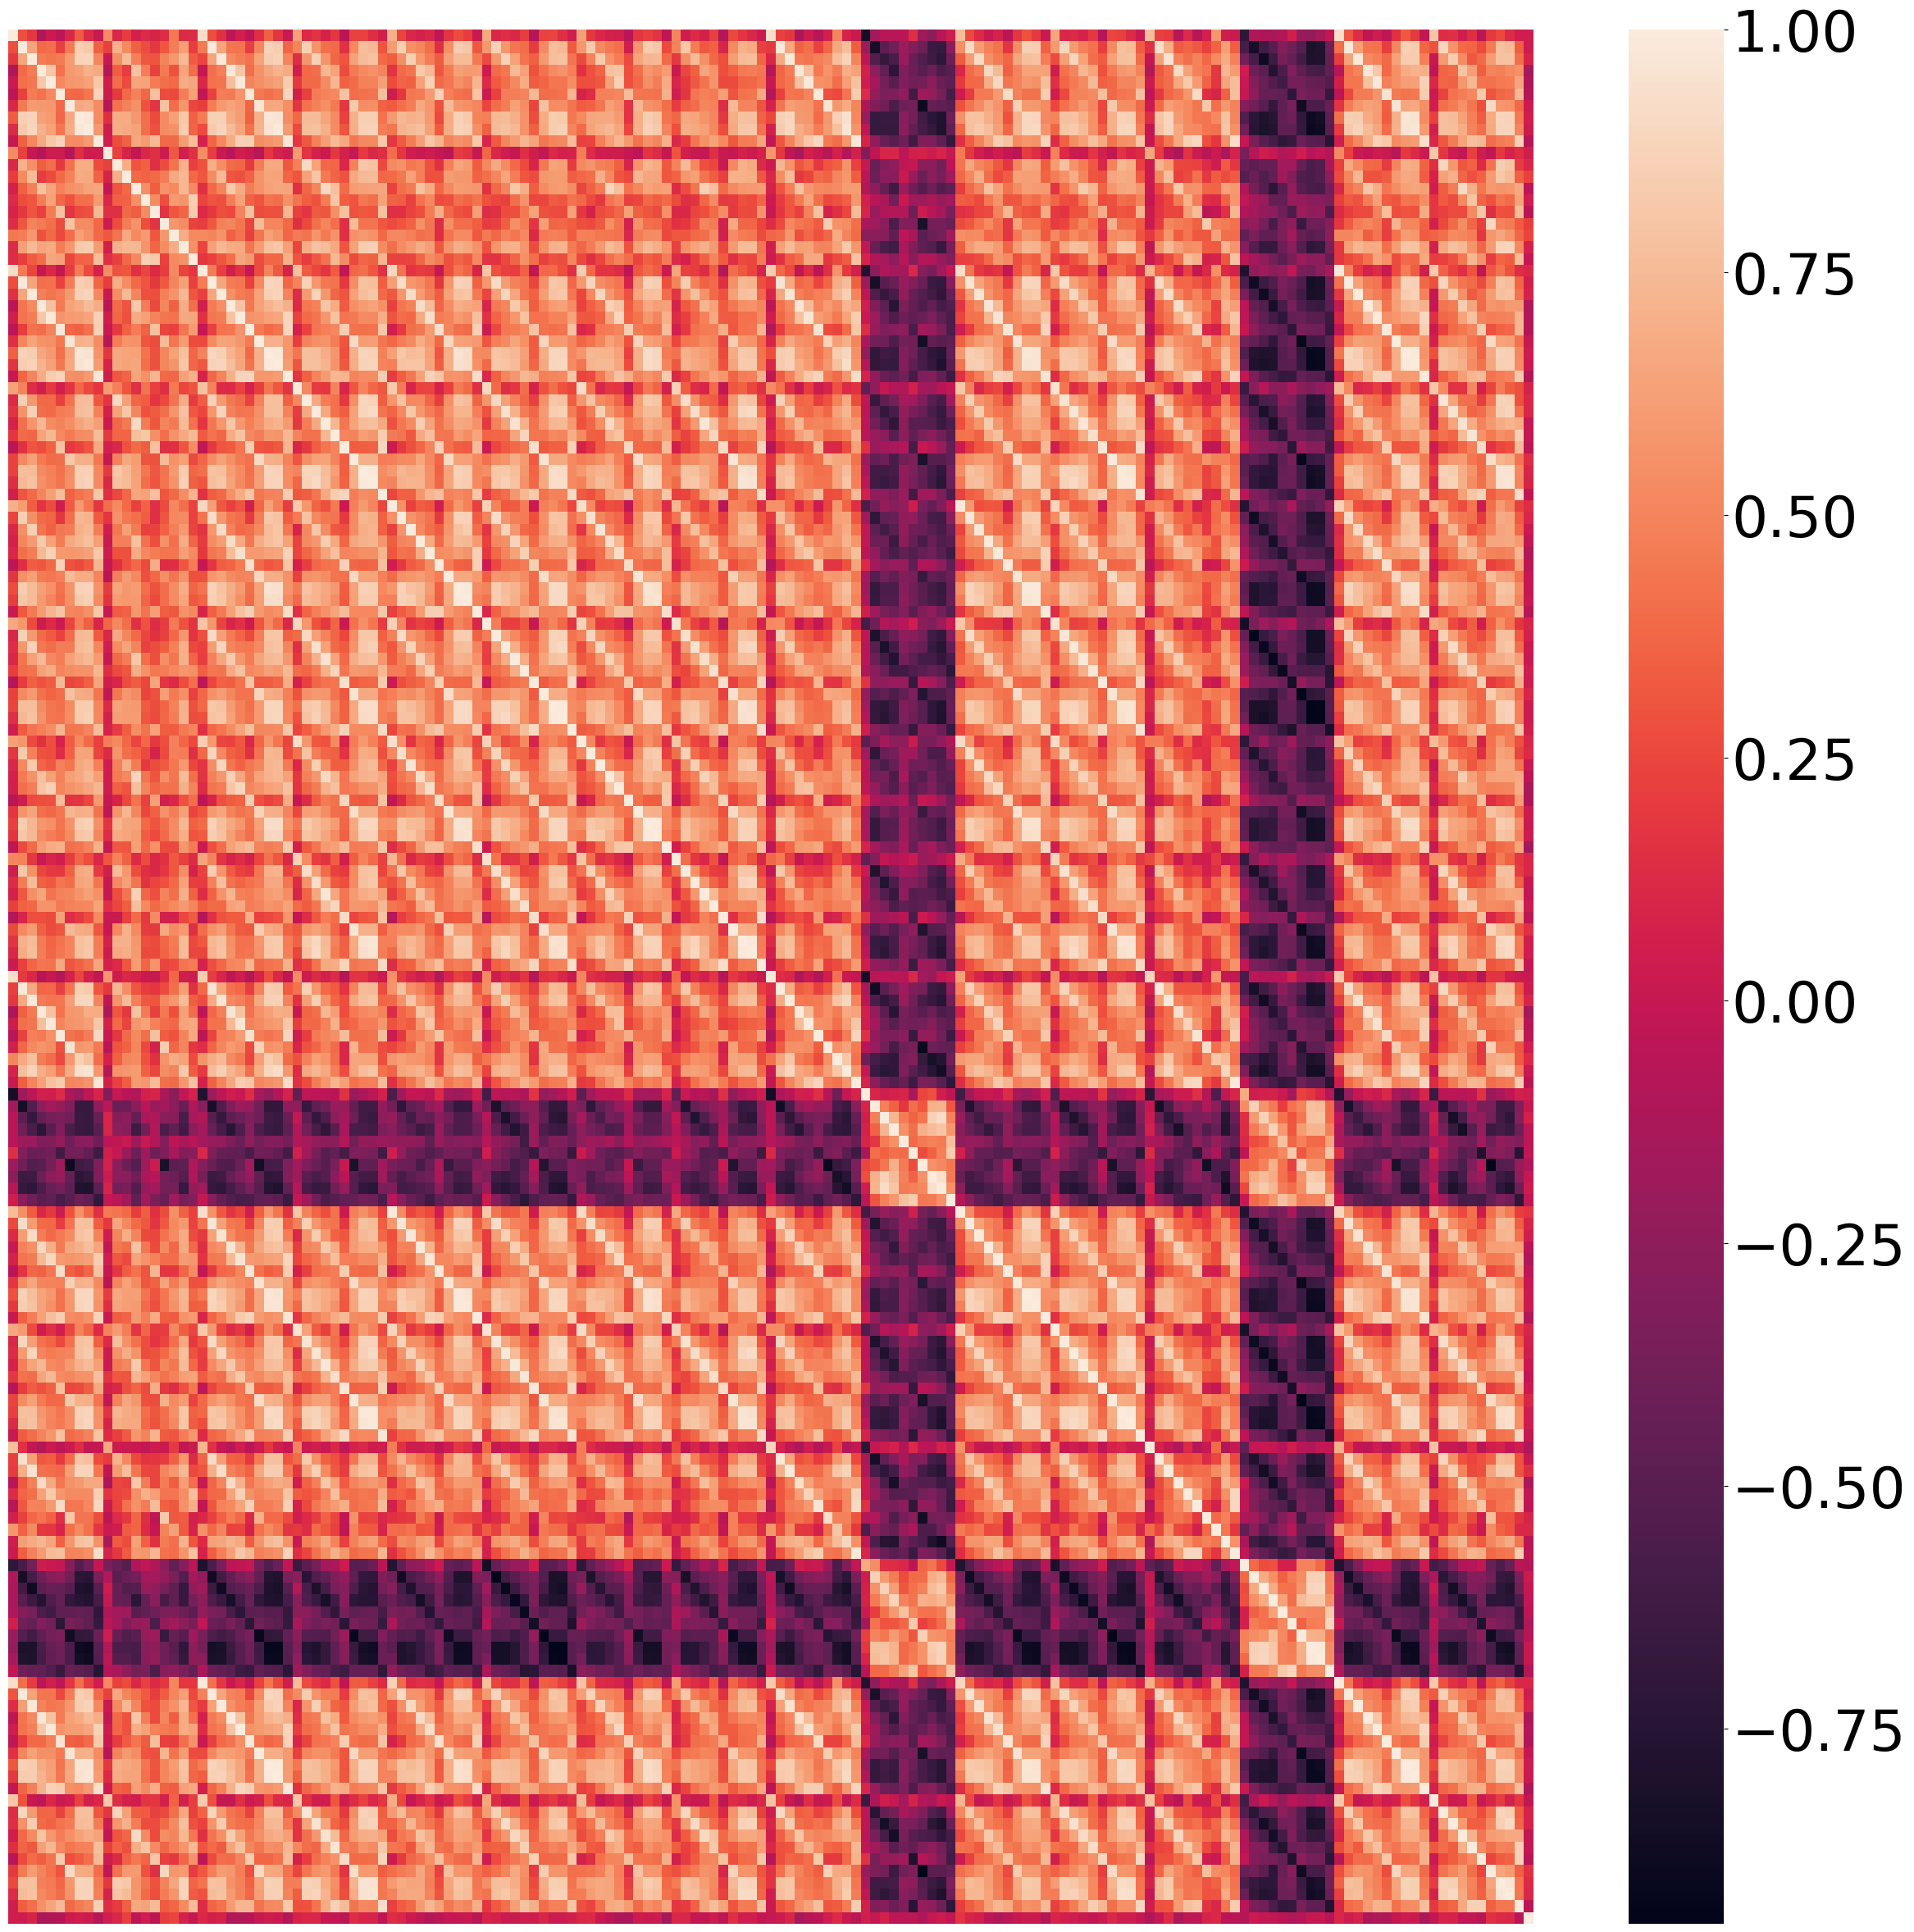

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

# create correlation matrix
corr_matrix = scaled_features.corr()

# plot heatmap large enough to show all features (Will need to be larger for bubbles, speech, and all)
plt.figure(figsize=(30, 30))
ax = sns.heatmap(corr_matrix, xticklabels=False, yticklabels=False)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=50)


# Create directory if it does not exist
if not os.path.exists(str(task_name)+'/figs'):
    os.makedirs(str(task_name)+'/figs')
    
# Save the correlation matrix
plt.savefig(str(task_name)+'/figs/corr_matrix.png')

# Show the correlation matrix
plt.show()



In [5]:
scaled_features

,gyro_data_list_0_5 median,gyro_data_list_5_10 median,gyro_data_list_10_15 median,gyro_data_list_15_19 median,gyro_data_list_19_22 median,gyro_data_list_22_25 median,gyro_data_list_25_30 median,gyro_data_list_0_19 median,gyro_data_list_5_19 median,gyro_data_list_19_25 median,...,acc_data_list_5_10 p75,acc_data_list_10_15 p75,acc_data_list_15_19 p75,acc_data_list_19_22 p75,acc_data_list_22_25 p75,acc_data_list_25_30 p75,acc_data_list_0_19 p75,acc_data_list_5_19 p75,acc_data_list_19_25 p75,total_prop
0,0.075559,0.121187,0.077331,0.072090,0.055375,0.040922,0.042095,0.122100,0.115588,0.063968,...,0.031318,0.016223,0.025096,0.030530,0.018779,0.022256,0.028098,0.027514,0.023188,0.172822
1,0.359541,0.177786,0.298816,0.376193,0.087071,0.199934,0.684320,0.411835,0.366249,0.181449,...,0.075904,0.092714,0.267139,0.087724,0.063245,0.413736,0.150712,0.150532,0.071783,0.264353
2,0.685686,0.554133,0.776762,0.520591,0.308083,0.225364,1.000000,0.935181,0.842979,0.327041,...,0.247841,0.613914,0.784767,0.374028,0.096156,1.000000,0.652608,0.641465,0.198076,1.000000
3,0.216002,0.092857,0.396538,0.113339,0.102994,0.041924,0.276571,0.238100,0.224547,0.100332,...,0.036938,0.132989,0.054692,0.051713,0.023932,0.095069,0.078132,0.076558,0.034852,0.490944
4,0.102929,0.032310,0.020992,0.076008,0.239079,0.399626,0.328490,0.047983,0.038407,0.427143,...,0.010963,0.005394,0.041274,0.434770,0.304291,0.164485,0.016519,0.015662,0.349202,0.631277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.093156,0.238653,0.269026,0.098029,0.129694,0.368730,0.133718,0.257518,0.243022,0.295301,...,0.130490,0.126037,0.076681,0.107667,0.174987,0.066580,0.122156,0.138024,0.126773,0.798863
80,0.384089,0.161926,0.126752,0.031175,0.014561,0.052753,0.113835,0.212817,0.157334,0.039769,...,0.046703,0.041430,0.008066,0.005995,0.009263,0.039927,0.053610,0.043006,0.006551,0.111119
81,0.143934,0.079498,0.089779,0.019132,0.170509,0.098029,0.493424,0.094484,0.078195,0.173192,...,0.009530,0.026020,0.003320,0.065090,0.037289,0.227485,0.013074,0.011867,0.047083,0.558001
82,0.028771,0.728430,0.547821,1.000000,1.000000,0.280304,0.774439,0.901402,0.964110,0.596947,...,0.512333,0.233809,0.316327,0.437265,0.103894,0.282005,0.418189,0.491332,0.189939,0.067437


In [6]:

# Define PC names for each task
approach_pc_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7']
speech_or_bubbles_pc_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19']
all_pc_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24']

if task_name == 'approach':
    pc_name_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7']

if task_name == 'speech':
    pc_name_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19']

if task_name == 'bubbles':
    pc_name_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19']

if task_name == 'all':
    pc_name_list = ['pc0', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19', 'pc20', 'pc21', 'pc22', 'pc23', 'pc24']


# Initialize the PCA model and fit the standardized data
pca = PCA(n_components=len(pc_name_list))
pca.fit(scaled_features)

# Transform the original data to the new reduced dimension space
transformed_data = pca.transform(scaled_features)

pc_df = pd.DataFrame(data = transformed_data
             , columns = pc_name_list)


 

In [7]:

pc_df


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.575847,-0.112097,-0.217973,-0.041498,0.337399,0.129171,-0.224200,0.034443
1,0.995270,-0.237435,-0.149409,1.248732,-0.599124,-0.343771,-0.131183,-0.403674
2,5.455121,-1.254289,0.644085,2.018916,-1.124994,0.264956,-0.108365,-0.429132
3,-0.407455,-0.445625,-0.275706,0.317478,-0.129840,0.310283,0.018831,0.180116
4,-0.321773,1.771582,0.700033,0.104675,-0.117003,-0.342944,0.616354,-0.258669
...,...,...,...,...,...,...,...,...
79,0.656837,0.250644,-0.210187,-0.785492,-0.030993,0.081652,0.429458,-0.072825
80,-1.052937,-0.575142,0.111246,-0.100096,0.025696,0.060410,-0.143037,-0.083024
81,-1.068724,0.257149,0.088445,0.400233,-0.562428,-0.455407,-0.071787,0.153687
82,4.083708,0.611433,-0.420329,1.206511,1.572040,-0.501499,-0.779458,1.451180


In [8]:
explained_vr = pca.explained_variance_ratio_
print('Explained variance of each PC in order: \n', explained_vr)
print('\n')
print('cumulative explained variance: \n',sum(explained_vr))



Explained variance of each PC in order: 
 [0.52375959 0.11980386 0.06540654 0.05060794 0.03652489 0.02848117
 0.02403079 0.02191734]


cumulative explained variance: 
 0.8705321159252251


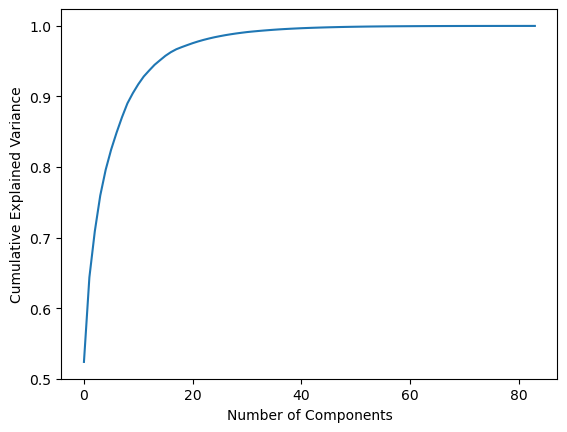

In [9]:

pca = PCA().fit(scaled_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


plt.savefig(str(task_name)+'/figs/cum_expl_var.png')

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [11]:
# create a dataframe that contains pc_df , targets

pc_and_targets = pd.concat([pc_df,targets],axis=1) 



In [12]:
# Turn all non-zero values = 1 for the last 3 columns (target columns)
pc_and_targets.iloc[:, -3:] = (pc_and_targets.iloc[:, -3:] != 0).astype(int)



In [13]:
pc_and_targets

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,depdxever,anxdxever,adhddxever
0,-1.575847,-0.112097,-0.217973,-0.041498,0.337399,0.129171,-0.224200,0.034443,0,0,0
1,0.995270,-0.237435,-0.149409,1.248732,-0.599124,-0.343771,-0.131183,-0.403674,1,1,0
2,5.455121,-1.254289,0.644085,2.018916,-1.124994,0.264956,-0.108365,-0.429132,0,1,1
3,-0.407455,-0.445625,-0.275706,0.317478,-0.129840,0.310283,0.018831,0.180116,0,1,0
4,-0.321773,1.771582,0.700033,0.104675,-0.117003,-0.342944,0.616354,-0.258669,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
79,0.656837,0.250644,-0.210187,-0.785492,-0.030993,0.081652,0.429458,-0.072825,0,0,0
80,-1.052937,-0.575142,0.111246,-0.100096,0.025696,0.060410,-0.143037,-0.083024,0,1,1
81,-1.068724,0.257149,0.088445,0.400233,-0.562428,-0.455407,-0.071787,0.153687,0,0,0
82,4.083708,0.611433,-0.420329,1.206511,1.572040,-0.501499,-0.779458,1.451180,1,1,1


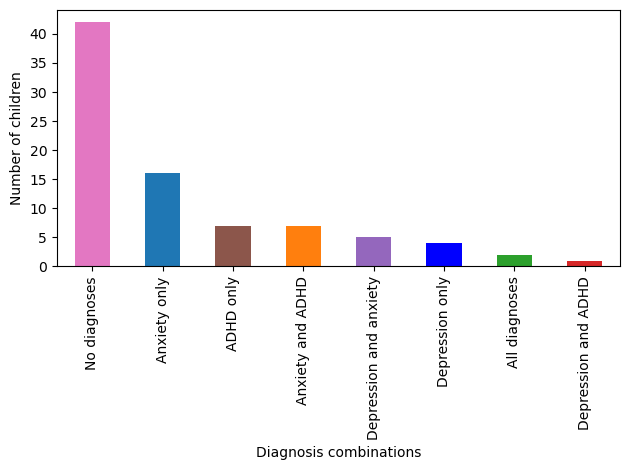

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataframe from a CSV file
#pc_and_targets = pd.read_csv('filename.csv')



# Define a dictionary that maps each combination of target values to a label
labels = {
    (False, False, False): 'No diagnoses',
    (True, False, False): 'Depression only',
    (False, True, False): 'Anxiety only',
    (False, False, True): 'ADHD only',
    (True, True, False): 'Depression and anxiety',
    (True, False, True): 'Depression and ADHD',
    (False, True, True): 'Anxiety and ADHD',
    (True, True, True): 'All diagnoses'
}

colors = {'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', 'blue'}

# Group the dataframe by the target variables and count the number of occurrences
counts = pc_and_targets.groupby(['depdxever', 'anxdxever', 'adhddxever']).size()

# Replace the combinations with the labels
counts = counts.reset_index().replace({'depdxever': {0: False, 1: True},
                                        'anxdxever': {0: False, 1: True},
                                        'adhddxever': {0: False, 1: True}})
counts['label'] = counts[['depdxever', 'anxdxever', 'adhddxever']].apply(tuple, axis=1).map(labels)

# Sort the counts dataframe by the count column in descending order
counts = counts.sort_values(by=0, ascending=False)

# Create a bar plot
counts.plot(x='label', y=0, kind='bar', legend=False, color=colors)
plt.xlabel('Diagnosis combinations')
plt.ylabel('Number of children')
plt.tight_layout()
plt.savefig(str(task_name)+'/figs/permutations.png')
plt.show()



# There are many positive cases of anxiety only. This class imbalance may be what is causing our 
# data to be predicting negative classes as positive

# order this chart by count from highest to lowest. Make the barplot horizontal.

In [15]:

pc_and_targets_combined = pc_and_targets

# initialize a new column 
pc_and_targets_combined['combined'] = 0

# loop through the rows and populate 'combined' column
for i, row in pc_and_targets.iterrows():
    depdxever = row['depdxever']
    anxdxever = row['anxdxever']
    adhddxever = row['adhddxever']
    
    # create a binary encoding of the last three columns
    combined_num = depdxever * 4 + anxdxever * 2 + adhddxever
    
    # assign the unique number to the 'combined' column
    pc_and_targets_combined.at[i, 'combined'] = combined_num




In [16]:
pc_and_targets_combined


,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,depdxever,anxdxever,adhddxever,combined
0,-1.575847,-0.112097,-0.217973,-0.041498,0.337399,0.129171,-0.224200,0.034443,0,0,0,0
1,0.995270,-0.237435,-0.149409,1.248732,-0.599124,-0.343771,-0.131183,-0.403674,1,1,0,6
2,5.455121,-1.254289,0.644085,2.018916,-1.124994,0.264956,-0.108365,-0.429132,0,1,1,3
3,-0.407455,-0.445625,-0.275706,0.317478,-0.129840,0.310283,0.018831,0.180116,0,1,0,2
4,-0.321773,1.771582,0.700033,0.104675,-0.117003,-0.342944,0.616354,-0.258669,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.656837,0.250644,-0.210187,-0.785492,-0.030993,0.081652,0.429458,-0.072825,0,0,0,0
80,-1.052937,-0.575142,0.111246,-0.100096,0.025696,0.060410,-0.143037,-0.083024,0,1,1,3
81,-1.068724,0.257149,0.088445,0.400233,-0.562428,-0.455407,-0.071787,0.153687,0,0,0,0
82,4.083708,0.611433,-0.420329,1.206511,1.572040,-0.501499,-0.779458,1.451180,1,1,1,7


In [17]:
from sklearn.model_selection import train_test_split



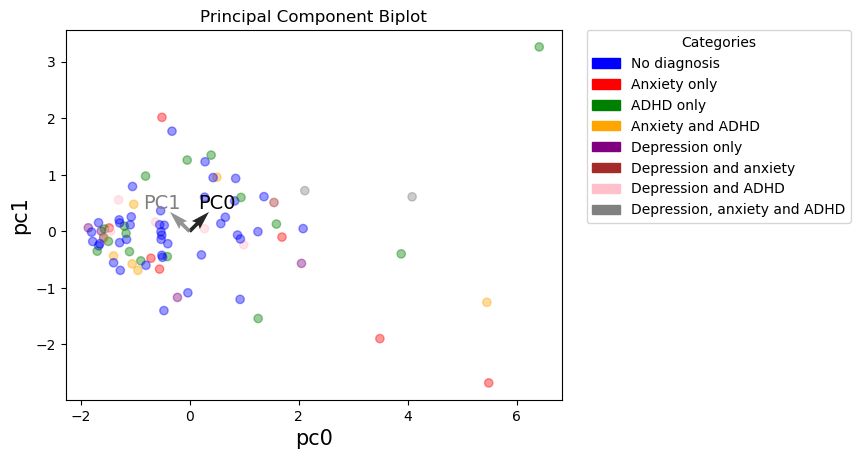

In [134]:
import matplotlib.pyplot as plt

# set the x and y axes
x = pc_and_targets_combined['pc0']
y = pc_and_targets_combined['pc1']

# create a dictionary that maps the values to colors
color_dict = {0: 'blue', 1: 'red', 2: 'green', 3: 'orange', 4: 'purple', 5: 'brown', 6: 'pink', 7: 'gray'}

# create a scatter plot with color based on depdxever, anxdxever, and adhddxever
plt.scatter(x, y, c=pc_and_targets_combined['combined'].apply(lambda x: color_dict[x]), alpha = 0.4)

# create legend
handles = [plt.Rectangle((0,0),1,1, color=color_dict[i]) for i in range(8)]
labels = ['No diagnosis', 'Anxiety only', 'ADHD only', 'Anxiety and ADHD', 'Depression only', 'Depression and anxiety', 'Depression and ADHD', 'Depression, anxiety and ADHD']

# Specify labels for each category
legend = plt.legend(handles, labels, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


# Define the biplot arrows
arrow_colors = ['black', 'gray']
arrow_labels = ['PC0', 'PC1']
arrow_vectors = [[0.5, 0.5], [-0.5, 0.5]]

# Plot the biplot arrows
for i in range(2):
    plt.quiver(0, 0, arrow_vectors[i][0], arrow_vectors[i][1], color=arrow_colors[i], label=arrow_labels[i], alpha=0.85)
    plt.text(arrow_vectors[i][0], arrow_vectors[i][1], arrow_labels[i], color=arrow_colors[i], fontsize=14, ha='center', va='center')

    
# Label plot
plt.title('Principal Component Biplot')
plt.xlabel('pc0', fontsize = '15')
plt.ylabel('pc1', fontsize = '15')

# Save and show the plot
plt.savefig(str(task_name)+'/figs/biplot.png')
plt.show()



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#train, val = train_test_split(pc_and_targets, test_size = .20, random_state = 42) # do I need this?


In [20]:
import seaborn as sns

def Get_Performance_Metrics(y_test, y_pred, y_pred_proba, model_name_indexed, oversampling_method_indexed):
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
#     print('Confusion matrix:')
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
#                 xticklabels=['Predicted Negative', 'Predicted Positive'],
#                 yticklabels=['Actual Negative', 'Actual Positive'])
#     plt.title('model: '+str(model_name_indexed)+', oversampling method: '+str(oversampling_method_indexed))
    
#     # Create directory if it does not exist
#     if not os.path.exists(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs'):
#         os.makedirs(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs')
    
#     plt.savefig(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs/+'+'+_conf_matrix.png')
#     plt.show()

    # Get true positives, false positives, true negatives, and false negatives
    tn, fp, fn, tp = cm.ravel()

    # Print true positives, false positives, true negatives, and false negatives
    print('True positives:', tp)
    print('False positives:', fp)
    print('True negatives:', tn)
    print('False negatives:', fn)

    # Plot the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
#     plt.figure()
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic')
#     plt.legend(loc="lower right")
    
#     plt.savefig(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs/+'+'+_roc_curve'+'.png')
#     plt.show()
    
        
    
    return accuracy, roc_auc, tpr, fpr, [tn, fp, fn, tp]
    


    

In [21]:
strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

from sklearn.model_selection import GridSearchCV

def Tune_Logistic_Regression(max_iter=10000):
    # define models to compare
    lr_model = LogisticRegression()

    # Define parameter grid for GridSearchCV
#     param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    
    param_grid = { 'penalty': ['l1', 'l2'],
                  'solver': [ 'liblinear'],
                  'max_iter': [100, 1000, 10000, 100000],
                  'class_weight': [None, 'balanced', {0: 0.2, 1: 0.8}]}

    # Perform random search to find the best hyperparameters
    randomized_search = RandomizedSearchCV(estimator=lr_model, param_distributions=param_grid, scoring='roc_auc', n_iter=50)
    return randomized_search
    
#     grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=strat_k_fold, scoring='roc_auc')
#     return grid_search



In [22]:
from sklearn.neural_network import MLPClassifier

def Tune_Neural_Network():
    # define models to compare
    nn_model = MLPClassifier(max_iter=10000)

    param_grid = {
        'hidden_layer_sizes': [(5,), (10,), (20,), (30,), (40,), (50,)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.01, 0.5],
        'max_iter': [5000, 10000]
    }

    # Perform random search to find the best hyperparameters
    
    randomized_search = RandomizedSearchCV(estimator=nn_model, param_distributions=param_grid, scoring='roc_auc', n_iter=50)
    return randomized_search
    
#     grid_search = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=strat_k_fold, scoring='roc_auc')
#     return grid_search


In [23]:
from sklearn.tree import DecisionTreeClassifier

def Tune_Decision_Tree():
    # define models to compare
    dt_model = DecisionTreeClassifier()

    # Define parameter grid for GridSearchCV
    param_grid = {
        'criterion': ['entropy'],
        'max_depth': [5, 10, 15, 20, 25, None],
        'min_samples_split': [2, 5, 10, 20, 50, 100],
        'min_samples_leaf': [1, 5, 10, 20, 50],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'splitter': ['best', 'random']
    }


    # Perform random search to find the best hyperparameters
    randomized_search = RandomizedSearchCV(estimator=dt_model, param_distributions=param_grid, scoring='roc_auc', n_iter=50)
    return randomized_search

#     grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=strat_k_fold, scoring='roc_auc')
#     return grid_search


In [24]:
from sklearn.ensemble import RandomForestClassifier

def Tune_Random_Forest():
    # define models to compare
    rf_model = RandomForestClassifier()

    # Define parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [5, 10, 50],
        'max_depth': [5, 10, 15, 20, 25, None],
        'min_samples_split': [2, 5, 10, 20, 50],
        'min_samples_leaf': [1, 5, 10, 20, 50],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'bootstrap': [True, False],
        'criterion': ['entropy']
    }


    # Perform random search to find the best hyperparameters
    randomized_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, scoring='roc_auc', n_iter=50)
    return randomized_search
    
#     grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=strat_k_fold, scoring='roc_auc')
#     return grid_search



In [25]:
from sklearn.ensemble import ExtraTreesClassifier

def Tune_Extra_Trees():
    # define models to compare
    et_model = ExtraTreesClassifier()

    # Define parameter grid for GridSearchCV
    

    param_grid = {
        'n_estimators': [5, 10, 50],
        'max_depth': [None, 5, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 5, 10, 20],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'bootstrap': [True, False],
        'criterion': ['entropy']
    }
        
        

    # Perform grid search to find the best hyperparameters
    
    randomized_search = RandomizedSearchCV(estimator=et_model, param_distributions=param_grid, scoring='roc_auc', n_iter=50)
    return randomized_search

#     grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=strat_k_fold, scoring='roc_auc')
#     return grid_search


In [26]:
from scipy.stats import shapiro

def shapiro_wilk(samples_list):

    # perform the Shapiro-Wilk test
    stat, p = shapiro(samples_list)

    # interpret the test results
    alpha = 0.05
    if p > alpha:
        return('Yes')
    else:
        return('No')


In [27]:
lr_model = Tune_Logistic_Regression()
nn_model = Tune_Neural_Network()
dt_model = Tune_Decision_Tree()
rf_model = Tune_Random_Forest()
et_model = Tune_Extra_Trees()

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

smote = SMOTE(random_state=42)
adasyn = ADASYN(random_state=42)
BorderlineSmote = BorderlineSMOTE(random_state=42)
svm_smote = SVMSMOTE(random_state=42)



# def Predict_Target(model_name, oversampling_method, target_column, model_name_indexed, oversampling_method_indexed):
    
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

def Predict_Target(model_name, oversampling_method, target_column, model_name_indexed, oversampling_method_indexed):
    
    
    
    
    
    
    
    accuracy_list = []
    auc_list = []
    tpr_list = []
    fpr_list = []
    
    tpr_array_list = []
    fpr_array_list = []

    conf_metrics_list = []

    

    
    
    
    
    
    
    for i in range(5):                    # number of runs for each model
        smote = SMOTE(random_state=i)
    
        # Splitting the data into training and testing sets
        X = pc_and_targets.iloc[:,0:len(pc_name_list)]  # approach = 8, speech = 20, bubbles = 20, all = 25
        y = pc_and_targets[target_column_list[k]]  # Target variable

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Apply SMOTE to balance the class distribution in the training data
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # fit the model with training data
        model_name.fit(X_train_resampled, y_train_resampled)

        # define the model with the best parameters
        model_best_estimator = model_name.best_estimator_
        print(model_best_estimator)


        # Predicting on the test set
        y_pred = model_best_estimator.predict(X_test)


        # get predicted probabilities
        y_pred_proba = model_best_estimator.predict_proba(X_test)[:,1]

        # Get Performance Metrics
        accuracy, roc_auc, tpr, fpr, conf_metrics = Get_Performance_Metrics(y_test, y_pred, y_pred_proba, model_name_indexed, oversampling_method_indexed)
        
        
        
        
        accuracy_list.append(accuracy)

        
        
        auc_list.append(roc_auc)
        
        tpr_list.append(np.mean(tpr)) # tpr is an array
        
        fpr_list.append(np.mean(tpr)) # fpr is an array
        
        tpr_array_list.append(tpr)
        
        fpr_array_list.append(fpr)
        
        conf_metrics_list.append(conf_metrics)            
        
   



    accuracy_min = np.min(accuracy_list)
    accuracy_mean = np.mean(accuracy_list)
    accuracy_max = np.max(accuracy_list)

    auc_min = np.min(auc_list)
    auc_mean = np.mean(auc_list)
    auc_max = np.max(auc_list)
    
    tpr_min = np.min(tpr_list)
    tpr_mean = np.mean(tpr_list)
    tpr_max = np.max(tpr_list)

    fpr_min = np.min(fpr_list)
    fpr_mean = np.mean(fpr_list)
    fpr_max = np.max(fpr_list)
    
    
    
#     data.append({'accuracy': [accuracy_min, accuracy_mean, accuracy_max],
#                     'auc metrics': [auc_min, auc_mean, auc_max],
#                     'tpr array': tpr,                          # Idk if I need this
#                     'fpr array': fpr,                          # Idk if I need this
#                     'tpr metrics': [tpr_min, tpr_mean, tpr_max],
#                     'fpr metrics': [fpr_min, fpr_mean, fpr_max],
#                     'confusion': conf_metrics,                         # Idk if I need this
#                     })
    
    
    #tpr_array_mean = np.mean(tpr_array_list, axis=0)
    #fpr_array_mean = np.mean(fpr_array_list, axis=0)
    
    
    # Define FPR axis range
    fpr_range = np.linspace(0, 1, 1000)

    # Create empty arrays for average FPR and TPR values
    avg_fpr = np.zeros_like(fpr_range)
    avg_tpr = np.zeros_like(fpr_range)

    # Interpolate TPR values at each FPR value
    for i, fpr in enumerate(fpr_range):
        tpr_values = []
        for j, fpr_array in enumerate(fpr_array_list):
            tpr_array = tpr_array_list[j]
            if fpr_array.min() <= fpr <= fpr_array.max():
                # Interpolate TPR value using np.interp()
                interp_tpr = np.interp(fpr, fpr_array, tpr_array)
                tpr_values.append(interp_tpr)
        if len(tpr_values) > 0:
            avg_tpr[i] = np.mean(tpr_values)
        else:
            avg_tpr[i] = 0
        avg_fpr[i] = fpr

    # Plot the average ROC curve ... comment this out if you're going to do a superimposed plot instead
    roc_auc = auc(avg_fpr, avg_tpr)
    plt.plot(avg_fpr, avg_tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Average ROC Curve')
    plt.legend(loc="lower right")

    
    plt.savefig(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs/'+str(target_column)+'avg_roc_curve'+'.png')
    plt.show()
    
    
    
    
    conf_metrics_array = np.array(conf_metrics_list)
    conf_metrics_mean = np.mean(conf_metrics_array, axis=0)
    
    # create a numpy array for the confusion matrix values
    cm = np.array(conf_metrics_mean)

    # reshape the array to a 2x2 matrix
    cm = cm.reshape((2,2))

    # create a heatmap using seaborn
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

    # set the axis labels and title
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Average Confusion Matrix')

    
    
    # Create directory if it does not exist
#     if not os.path.exists(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs'):
#         os.makedirs(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs')
    
    plt.savefig(str(task_name)+'/'+str(model_name_indexed)+'/'+str(oversampling_method_indexed)+'/figs/'+str(target_column)+'avg_conf_matrix.png')
    
    # show the plot
    plt.show()
    
    
    
    

    
    
#         data.append({'accuracy': [accuracy_min, accuracy_mean, accuracy_max],
#                     'roc auc metrics': [auc_min, auc_mean, auc_max],
#                     'tpr array': tpr,
#                     'fpr array': fpr,
#                     'tpr metrics': [tpr_min, tpr_mean, tpr_max],
#                     'fpr metrics': [fpr_min, fpr_mean, fpr_max],
#                     'confusion': conf_metrics,
#                     })
    data = []
    data.append({'accuracy': [accuracy_min, accuracy_mean, accuracy_max],
                'auc metrics': [auc_min, auc_mean, auc_max],
                'tpr array': tpr,                          # Idk if I need this
                'fpr array': fpr,                          # Idk if I need this
                'tpr metrics': [tpr_min, tpr_mean, tpr_max],
                'fpr metrics': [fpr_min, fpr_mean, fpr_max],
                'confusion': conf_metrics,                         # Idk if I need this
                'avg fpr, avg tpr': (avg_fpr, avg_tpr),
                'auc list': auc_list
                })
    
    
    
    return data

    


   


----------------------------Logistic Regression, SMOTE-------------------
---------------------------- Target Column:depdxever------------------------------
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.0
True positives: 0
False positives: 16
True negatives: 0
False negatives: 1
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.058823529411764705
True positives: 0
False positives: 15
True negatives: 1
False negatives: 1
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.0
True positives: 0
False positives: 16
True negatives: 0
False negatives: 1
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.058823529411764705
True positives: 0
False positives: 15
True negatives: 1
False negatives: 1
LogisticRegression(solver='liblinear')
Accuracy: 0.7058823529411765
True positives: 0
False positives: 4
True negatives: 12
False negatives: 1


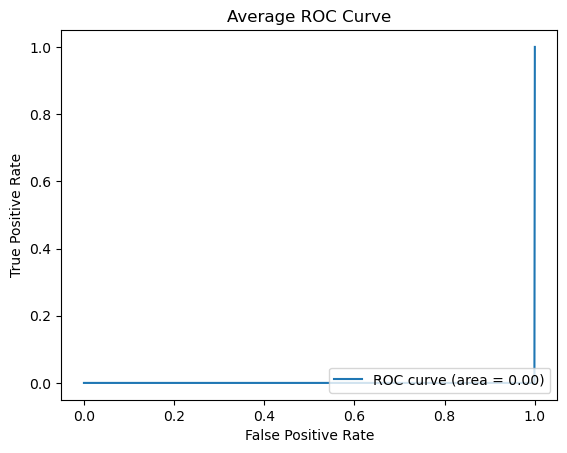

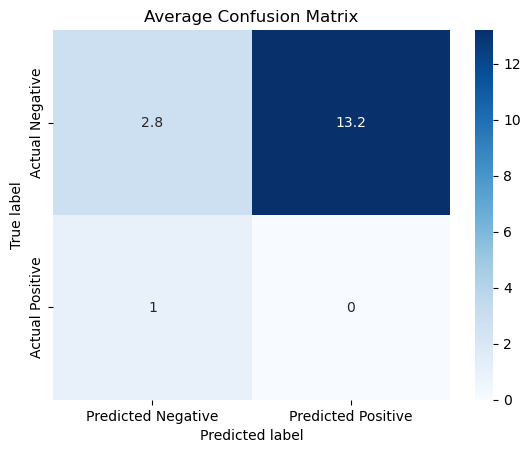

----------------------------Logistic Regression, SMOTE-------------------
---------------------------- Target Column:anxdxever------------------------------
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, penalty='l1',
                   solver='liblinear')
Accuracy: 0.17647058823529413
True positives: 3
False positives: 13
True negatives: 0
False negatives: 1
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.23529411764705882
True positives: 4
False positives: 13
True negatives: 0
False negatives: 0
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.23529411764705882
True positives: 4
False positives: 13
True negatives: 0
False negatives: 0
LogisticRegression(solver='liblinear')
Accuracy: 0.47058823529411764
True positives: 2
False positives: 7
True negatives: 6
False negatives: 2
LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Accuracy: 0.47058823529411764
True positives: 2
False positives:

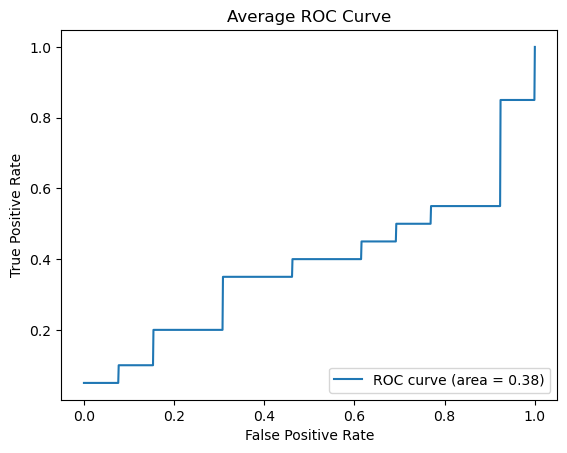

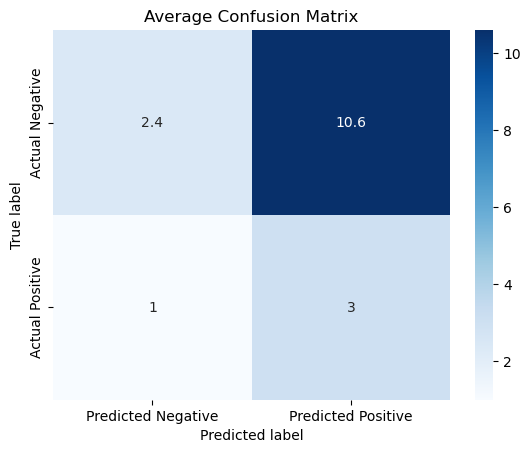

----------------------------Logistic Regression, SMOTE-------------------
---------------------------- Target Column:adhddxever------------------------------
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.17647058823529413
True positives: 2
False positives: 14
True negatives: 1
False negatives: 0
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.11764705882352941
True positives: 2
False positives: 15
True negatives: 0
False negatives: 0
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')
Accuracy: 0.17647058823529413
True positives: 2
False positives: 14
True negatives: 1
False negatives: 0
LogisticRegression(solver='liblinear')
Accuracy: 0.6470588235294118
True positives: 1
False positives: 5
True negatives: 10
False negatives: 1
LogisticRegression(class_weight={0: 0.2, 1: 0.8}, penalty='l1',
                   solver='liblinear')
Accuracy: 0.11764705882352941
True positives: 2
False positives: 15
Tru

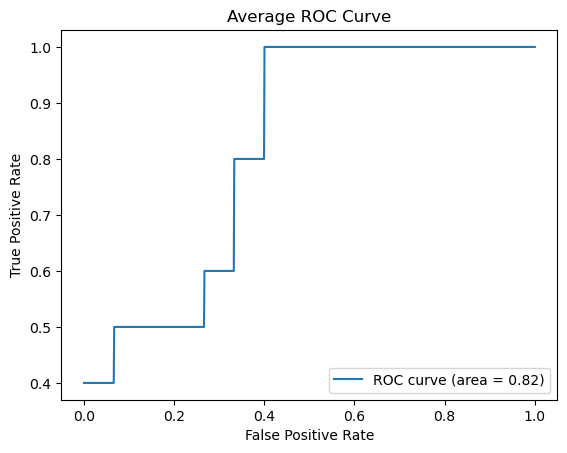

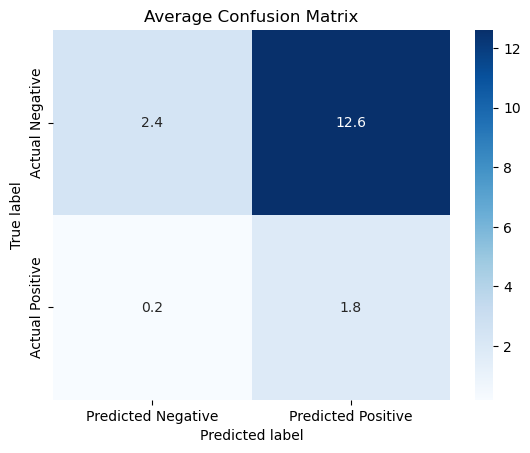

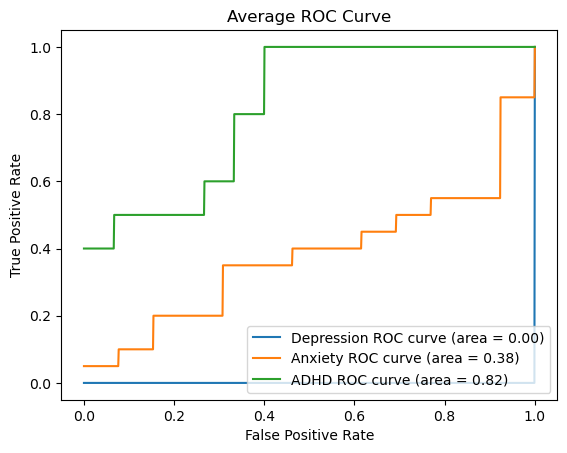

----------------------------Neural Network, SMOTE-------------------
---------------------------- Target Column:depdxever------------------------------
MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.5,
              max_iter=10000)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 2
True negatives: 14
False negatives: 1
MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), learning_rate_init=0.5,
              max_iter=10000)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 2
True negatives: 14
False negatives: 1
MLPClassifier(alpha=0.001, hidden_layer_sizes=(50,), learning_rate_init=0.5,
              max_iter=10000)
Accuracy: 0.6470588235294118
True positives: 0
False positives: 5
True negatives: 11
False negatives: 1
MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.5,
              max_iter=10000)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 2
True negatives: 14
False negatives: 1
MLPCl

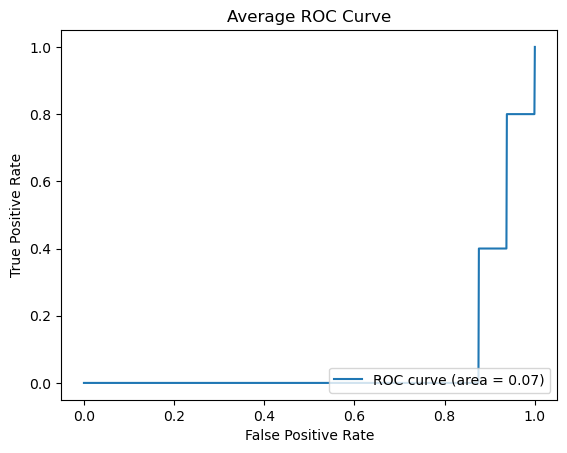

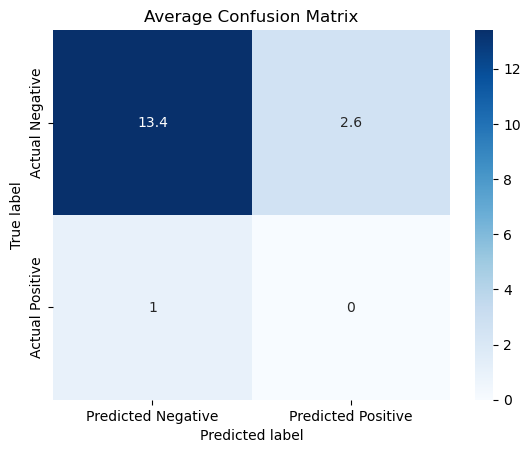

----------------------------Neural Network, SMOTE-------------------
---------------------------- Target Column:anxdxever------------------------------
MLPClassifier(alpha=0.01, hidden_layer_sizes=(10,), learning_rate_init=0.01,
              max_iter=5000)
Accuracy: 0.35294117647058826
True positives: 0
False positives: 7
True negatives: 6
False negatives: 4
MLPClassifier(alpha=0.001, hidden_layer_sizes=(40,), learning_rate_init=0.5,
              max_iter=10000)
Accuracy: 0.4117647058823529
True positives: 0
False positives: 6
True negatives: 7
False negatives: 4
MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.5,
              max_iter=10000)
Accuracy: 0.47058823529411764
True positives: 0
False positives: 5
True negatives: 8
False negatives: 4
MLPClassifier(alpha=0.01, hidden_layer_sizes=(30,), learning_rate_init=0.5,
              max_iter=5000)
Accuracy: 0.47058823529411764
True positives: 1
False positives: 6
True negatives: 7
False negatives: 3
MLPClassi

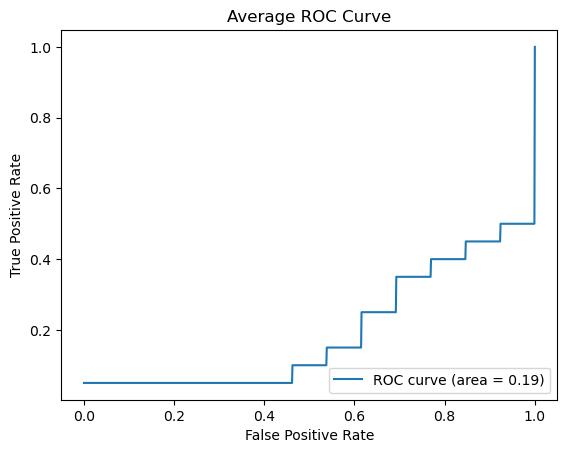

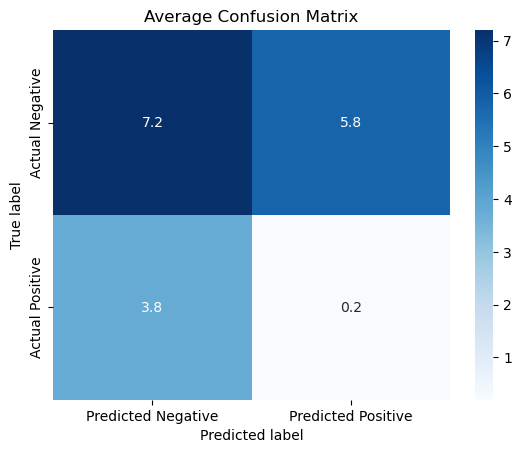

----------------------------Neural Network, SMOTE-------------------
---------------------------- Target Column:adhddxever------------------------------
MLPClassifier(alpha=0.001, hidden_layer_sizes=(40,), learning_rate_init=0.01,
              max_iter=10000)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 1
True negatives: 14
False negatives: 2
MLPClassifier(alpha=0.001, hidden_layer_sizes=(5,), learning_rate_init=0.01,
              max_iter=10000)
Accuracy: 0.6470588235294118
True positives: 0
False positives: 4
True negatives: 11
False negatives: 2
MLPClassifier(alpha=0.001, hidden_layer_sizes=(5,), learning_rate_init=0.01,
              max_iter=5000)
Accuracy: 0.6470588235294118
True positives: 0
False positives: 4
True negatives: 11
False negatives: 2
MLPClassifier(alpha=0.001, hidden_layer_sizes=(40,), learning_rate_init=0.5,
              max_iter=5000)
Accuracy: 0.7058823529411765
True positives: 0
False positives: 3
True negatives: 12
False negatives: 2
MLPC

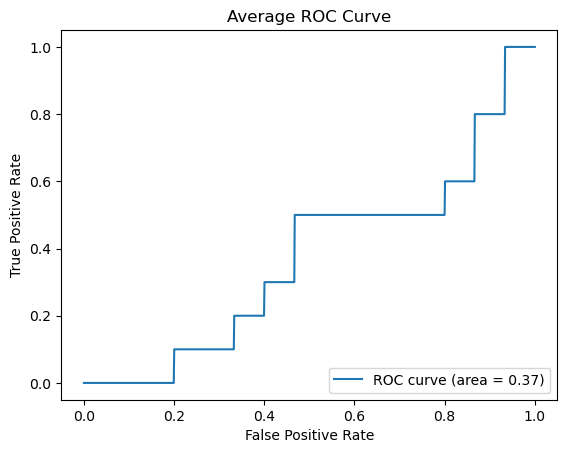

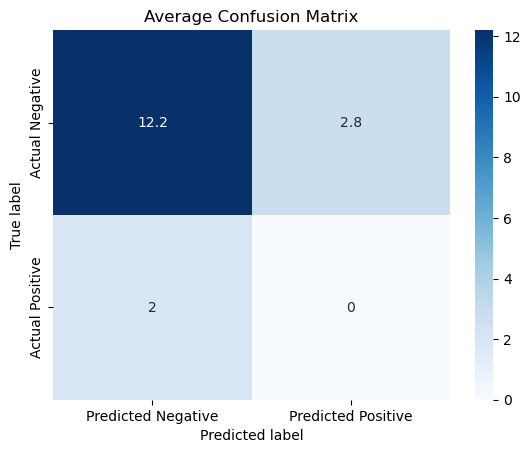

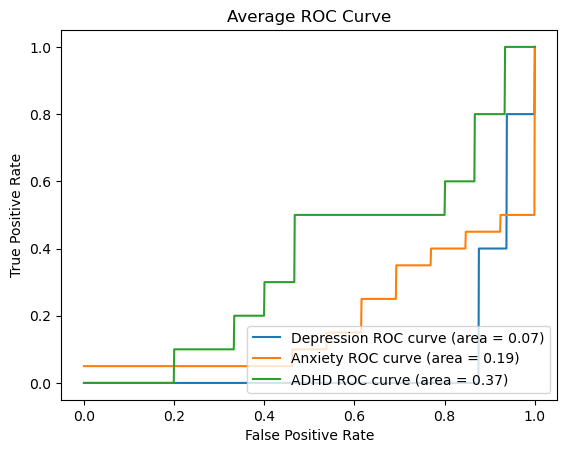

----------------------------Decision Tree, SMOTE-------------------
---------------------------- Target Column:depdxever------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=20)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 2
True negatives: 14
False negatives: 1
DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10)
Accuracy: 0.9411764705882353
True positives: 0
False positives: 0
True negatives: 16
False negatives: 1
DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='auto',
                       min_samples_split=20)
Accuracy: 0.7058823529411765
True positives: 0
False positives: 4
True negatives: 12
False negatives: 1
DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='sqrt')
Accuracy: 0.9411764705882353
True positives: 0
False positives: 0
True negatives: 16
Fals

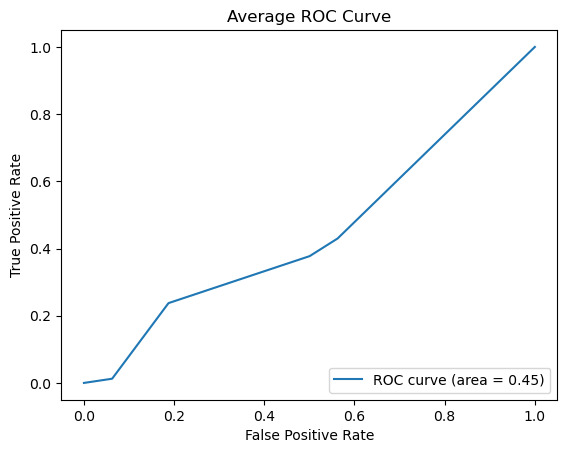

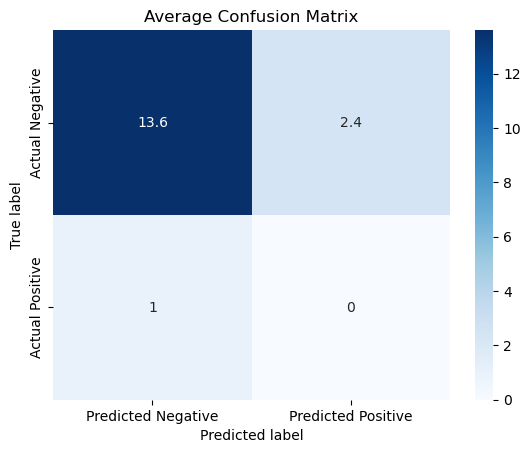

----------------------------Decision Tree, SMOTE-------------------
---------------------------- Target Column:anxdxever------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_split=5)
Accuracy: 0.47058823529411764
True positives: 1
False positives: 6
True negatives: 7
False negatives: 3
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       splitter='random')
Accuracy: 0.35294117647058826
True positives: 3
False positives: 10
True negatives: 3
False negatives: 1
DecisionTreeClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=5)
Accuracy: 0.4117647058823529
True positives: 1
False positives: 7
True negatives: 6
False negatives: 3
DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=5)
Accuracy: 0.5294117647058824
True positives: 1
False positives: 5
True negativ

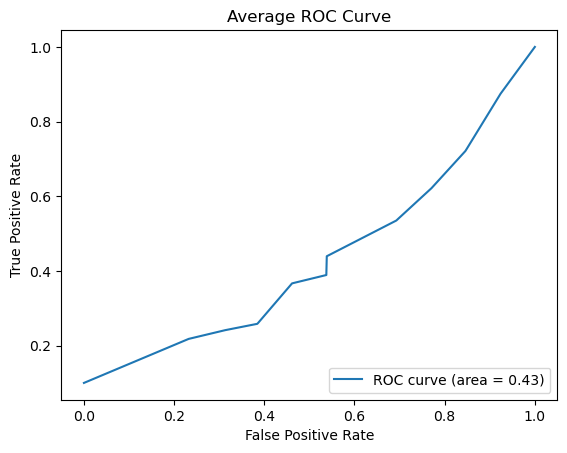

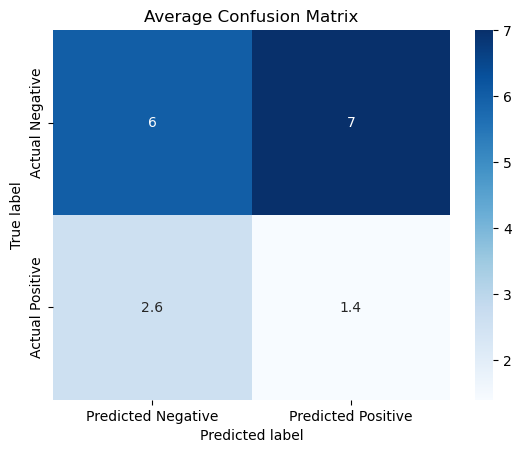

----------------------------Decision Tree, SMOTE-------------------
---------------------------- Target Column:adhddxever------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20)
Accuracy: 0.7647058823529411
True positives: 1
False positives: 3
True negatives: 12
False negatives: 1
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=20, splitter='random')
Accuracy: 0.7647058823529411
True positives: 0
False positives: 2
True negatives: 13
False negatives: 2
DecisionTreeClassifier(criterion='entropy', max_depth=15, splitter='random')
Accuracy: 0.8235294117647058
True positives: 0
False positives: 1
True negatives: 14
False negatives: 2
DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       min_samples_split=10)
Accuracy: 0.8235294117647058
True positives: 1
False positives: 2
True negatives: 13
False negatives: 1
DecisionTreeClassifier(c

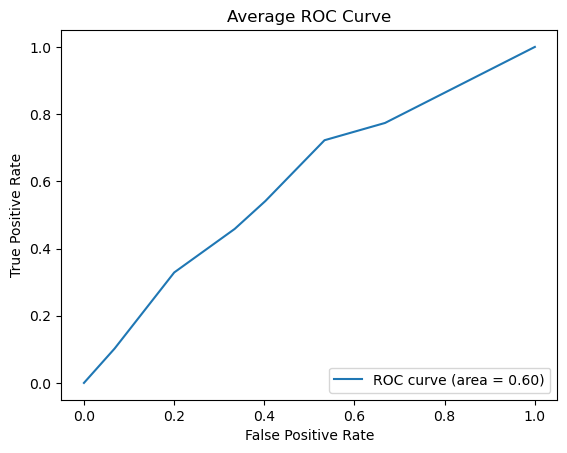

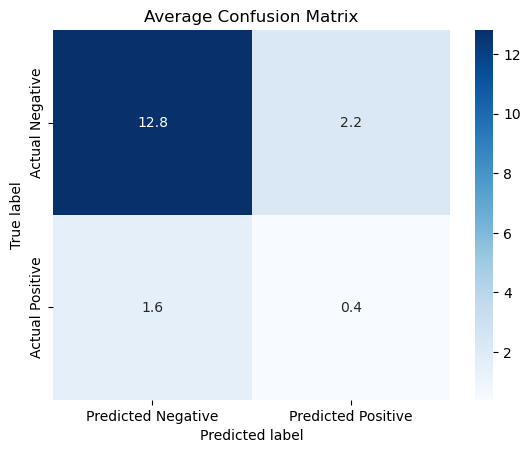

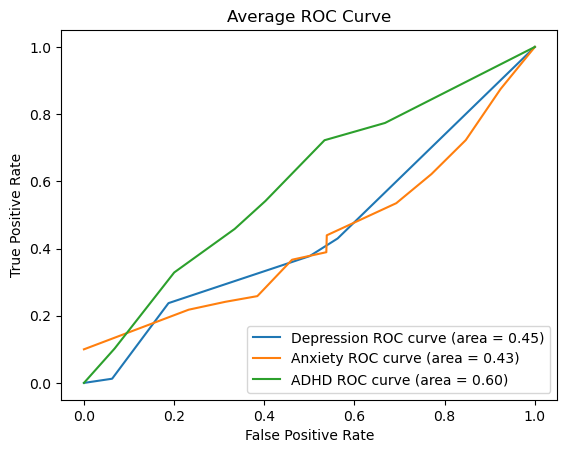

----------------------------Random Forest, SMOTE-------------------
---------------------------- Target Column:depdxever------------------------------
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       n_estimators=10)
Accuracy: 0.8823529411764706
True positives: 0
False positives: 1
True negatives: 15
False negatives: 1
RandomForestClassifier(criterion='entropy', n_estimators=50)
Accuracy: 0.9411764705882353
True positives: 0
False positives: 0
True negatives: 16
False negatives: 1
RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2',
                       n_estimators=50)
Accuracy: 0.8823529411764706
True positives: 0
False positives: 1
True negatives: 15
False negatives: 1
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       max_features='sqrt', min_samples_split=5,
                       n_estimators=50)
Accuracy: 0.9411764705882353
True positives: 0
False positives

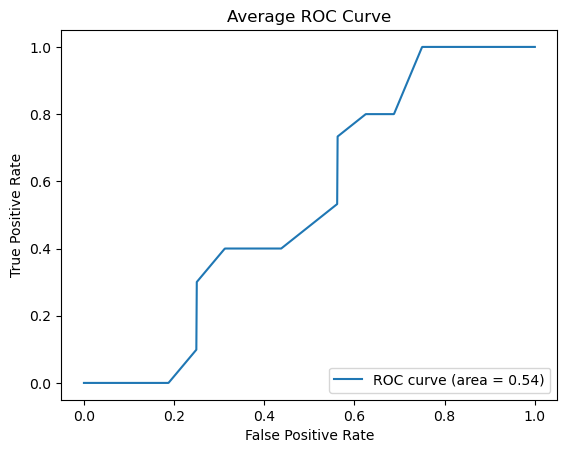

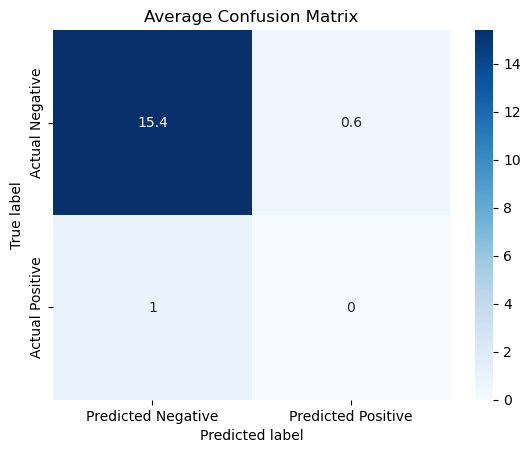

----------------------------Random Forest, SMOTE-------------------
---------------------------- Target Column:anxdxever------------------------------
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features='sqrt', min_samples_split=20,
                       n_estimators=10)
Accuracy: 0.5882352941176471
True positives: 3
False positives: 6
True negatives: 7
False negatives: 1
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=5,
                       max_features='sqrt', n_estimators=50)
Accuracy: 0.6470588235294118
True positives: 2
False positives: 4
True negatives: 9
False negatives: 2
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=15,
                       max_features='sqrt', min_samples_split=10,
                       n_estimators=50)
Accuracy: 0.6470588235294118
True positives: 2
False positives: 4
True negatives: 9
False negatives: 2
RandomForestClassifier(bootstrap=False, crit

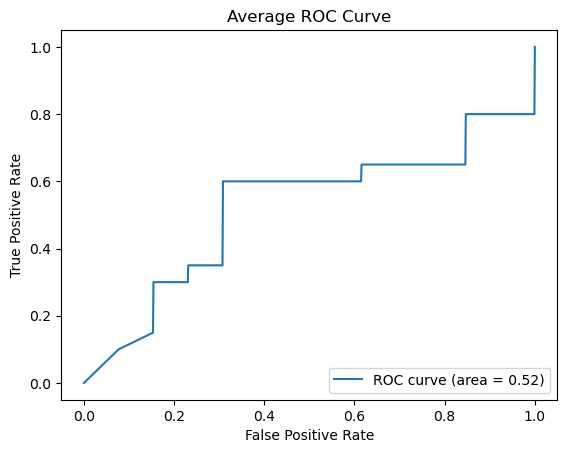

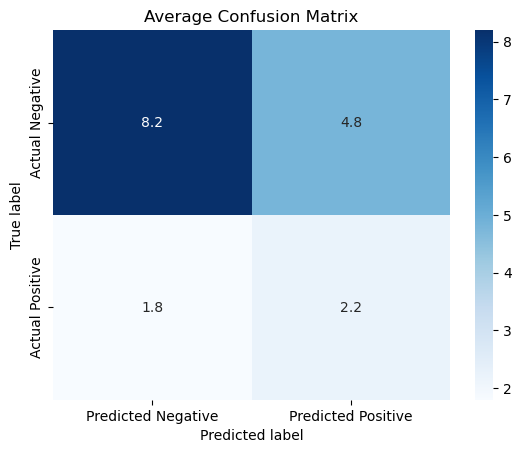

----------------------------Random Forest, SMOTE-------------------
---------------------------- Target Column:adhddxever------------------------------
RandomForestClassifier(criterion='entropy', max_depth=20, max_features=None,
                       min_samples_split=5, n_estimators=50)
Accuracy: 0.7647058823529411
True positives: 0
False positives: 2
True negatives: 13
False negatives: 2
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=25,
                       max_features='log2', n_estimators=10)
Accuracy: 0.6470588235294118
True positives: 0
False positives: 4
True negatives: 11
False negatives: 2
RandomForestClassifier(criterion='entropy', max_depth=15, max_features='log2',
                       min_samples_split=10, n_estimators=50)
Accuracy: 0.7058823529411765
True positives: 0
False positives: 3
True negatives: 12
False negatives: 2
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=20,
                       max_features='log2', n_

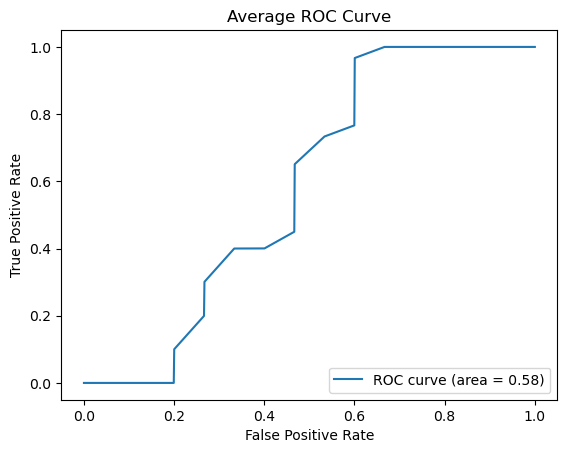

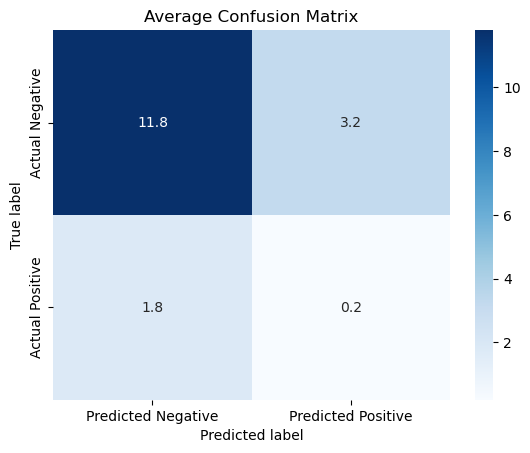

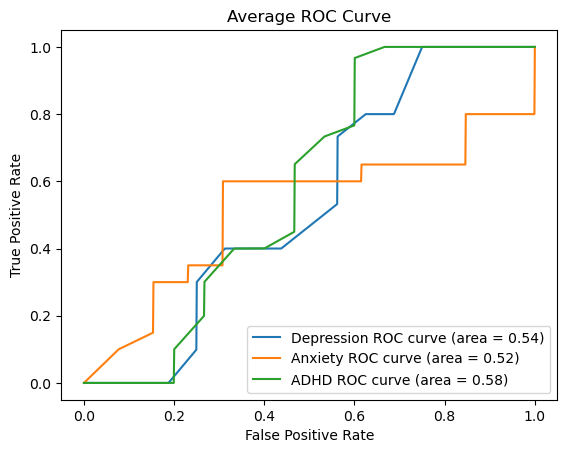

----------------------------Extra Trees, SMOTE-------------------
---------------------------- Target Column:depdxever------------------------------
ExtraTreesClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                     n_estimators=50)
Accuracy: 0.8823529411764706
True positives: 0
False positives: 1
True negatives: 15
False negatives: 1
ExtraTreesClassifier(criterion='entropy', max_depth=20, max_features='log2',
                     n_estimators=50)
Accuracy: 0.8823529411764706
True positives: 0
False positives: 1
True negatives: 15
False negatives: 1
ExtraTreesClassifier(criterion='entropy', max_features=None,
                     min_samples_split=5, n_estimators=10)
Accuracy: 0.8823529411764706
True positives: 0
False positives: 1
True negatives: 15
False negatives: 1
ExtraTreesClassifier(criterion='entropy', max_features='log2', n_estimators=50)
Accuracy: 0.8823529411764706
True positives: 0
False positives: 1
True negatives: 15
False negatives: 1
Extra

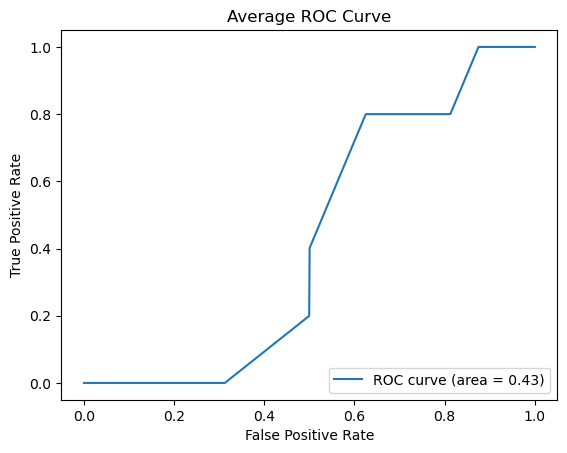

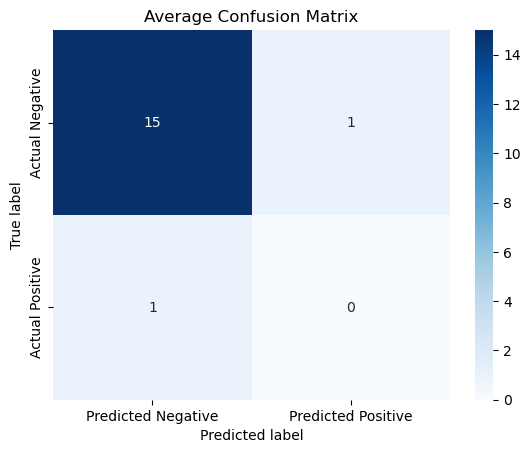

----------------------------Extra Trees, SMOTE-------------------
---------------------------- Target Column:anxdxever------------------------------
ExtraTreesClassifier(criterion='entropy', max_depth=20, max_features=None,
                     min_samples_split=20, n_estimators=50)
Accuracy: 0.5294117647058824
True positives: 1
False positives: 5
True negatives: 8
False negatives: 3
ExtraTreesClassifier(criterion='entropy', max_depth=10, min_samples_split=20,
                     n_estimators=5)
Accuracy: 0.5882352941176471
True positives: 1
False positives: 4
True negatives: 9
False negatives: 3
ExtraTreesClassifier(criterion='entropy', max_depth=40, max_features=None,
                     min_samples_split=5, n_estimators=50)
Accuracy: 0.5882352941176471
True positives: 1
False positives: 4
True negatives: 9
False negatives: 3
ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=5,
                     max_features=None, min_samples_split=5, n_estimators=50)
Accuracy:

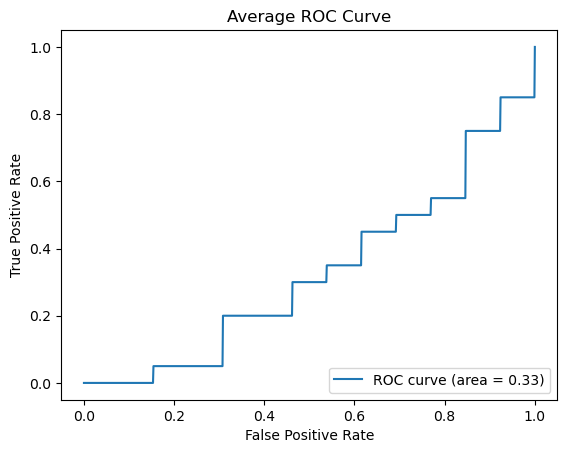

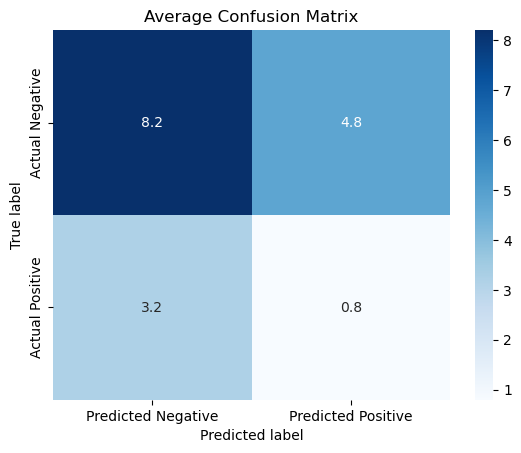

----------------------------Extra Trees, SMOTE-------------------
---------------------------- Target Column:adhddxever------------------------------
ExtraTreesClassifier(criterion='entropy', max_depth=20, max_features='log2',
                     min_samples_split=5, n_estimators=50)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 1
True negatives: 14
False negatives: 2
ExtraTreesClassifier(criterion='entropy', max_depth=30, max_features='log2',
                     n_estimators=50)
Accuracy: 0.8235294117647058
True positives: 0
False positives: 1
True negatives: 14
False negatives: 2
ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_depth=30,
                     max_features='sqrt', n_estimators=50)
Accuracy: 0.6470588235294118
True positives: 0
False positives: 4
True negatives: 11
False negatives: 2
ExtraTreesClassifier(criterion='entropy', min_samples_split=5, n_estimators=50)
Accuracy: 0.6470588235294118
True positives: 0
False positives: 4
True negat

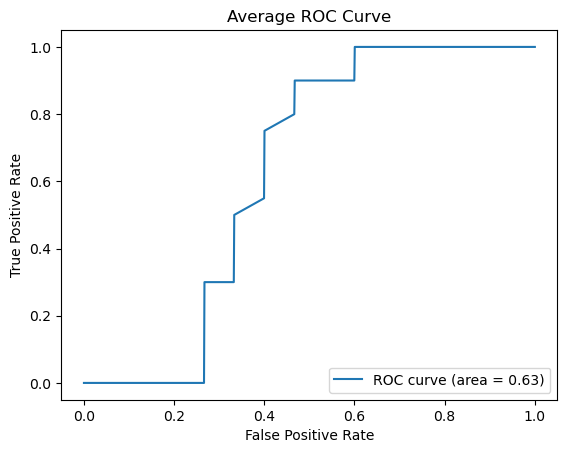

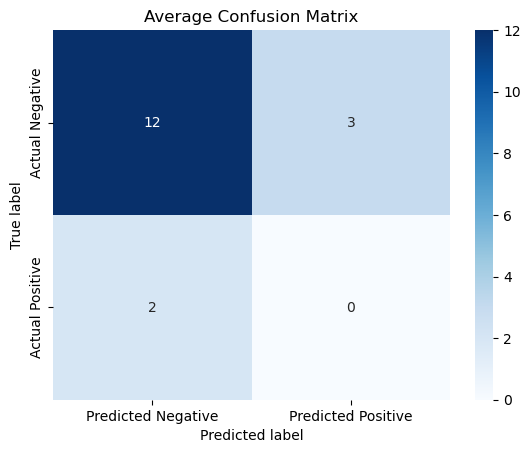

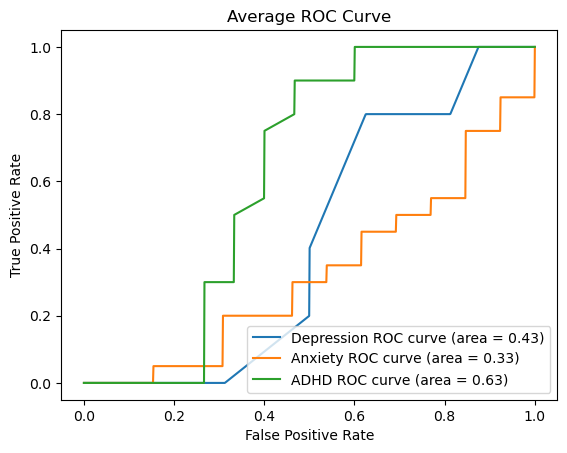

In [28]:


target_column_list = ['depdxever', 'anxdxever', 'adhddxever']
model_list = [lr_model, nn_model, dt_model, rf_model, et_model]
oversampling_list = [smote, adasyn, BorderlineSmote, svm_smote]

target_column_names = ['Depression', 'Anxiety', 'ADHD']
model_names = ['Logistic Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'Extra Trees']
oversampling_names = ['SMOTE', 'ADASYN', 'Borderline SMOTE', 'SVM SMOTE']


results = []
auc_data = []


for i in range(5):   # added in extra trees, so now the range is 5
    for j in range(1): # 1 is just smote. 4 is max value.

# target column index can be 8 through 11
# Get performance 
        
        roc_plot_data_list = []
        for k in range(len(target_column_list)):
            print('----------------------------'+model_names[i]+', '+oversampling_names[j]+'-------------------')
            print('---------------------------- Target Column:'+str(target_column_list[k])+'------------------------------')
            data = Predict_Target(model_list[i], oversampling_list[j], target_column_list[k], model_names[i], oversampling_names[j])

#             print(accuracy, roc_auc)            
            results.append({'Model': str(model_names[i]),
                            'Oversampler': str(oversampling_names[j]),
                            'Target Disorder': target_column_names[k],
                            'Accuracy Report: Min, Avg, Max': '{:.3f}, {:.3f}, {:.3f}'.format(data[0]['accuracy'][0], data[0]['accuracy'][1], data[0]['accuracy'][2]),
                            'AUC Report: Min, Avg, Max': '{:.3f}, {:.3f}, {:.3f}'.format(data[0]['auc metrics'][0], data[0]['auc metrics'][1], data[0]['auc metrics'][2]),
                            'tpr Report: Min, Avg, Max': '{:.3f}, {:.3f}, {:.3f}'.format(data[0]['tpr metrics'][0], data[0]['tpr metrics'][1], data[0]['tpr metrics'][2]),
                            'fpr Report: Min, Avg, Max': '{:.3f}, {:.3f}, {:.3f}'.format(data[0]['fpr metrics'][0], data[0]['tpr metrics'][1], data[0]['tpr metrics'][2]),
                            })  
            roc_plot_data_list.append(data[0]['avg fpr, avg tpr'])
        
            auc_data.append({'Model': str(model_names[i]),
                            'Target Disorder': target_column_names[k],
                            'AUC List': data[0]['auc list']
                            })  
            


    avg_fpr_depression, avg_tpr_depression = roc_plot_data_list[0]
    avg_fpr_anxiety, avg_tpr_anxiety = roc_plot_data_list[1]
    avg_fpr_adhd, avg_tpr_adhd = roc_plot_data_list[2]

    roc_auc_depression = auc(avg_fpr_depression, avg_tpr_depression)
    roc_auc_anxiety = auc(avg_fpr_anxiety, avg_tpr_anxiety)
    roc_auc_adhd = auc(avg_fpr_adhd, avg_tpr_adhd)


    plt.plot(avg_fpr_depression, avg_tpr_depression, label='Depression ROC curve (area = %0.2f)' % roc_auc_depression)
    plt.plot(avg_fpr_anxiety, avg_tpr_anxiety, label='Anxiety ROC curve (area = %0.2f)' % roc_auc_anxiety)
    plt.plot(avg_fpr_adhd, avg_tpr_adhd, label='ADHD ROC curve (area = %0.2f)' % roc_auc_adhd)


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Average ROC Curve')
    plt.legend(loc="lower right")
    
    plt.savefig(str(task_name)+'/'+model_names[i]+'/'+oversampling_names[j]+'/figs/super_avg_roc_curve'+'.png')
    plt.show()
    
            
results_df = pd.DataFrame(results)            
auc_df = pd.DataFrame(auc_data)          


In [29]:
results_df


,Model,Oversampler,Target Disorder,"Accuracy Report: Min, Avg, Max","AUC Report: Min, Avg, Max","tpr Report: Min, Avg, Max","fpr Report: Min, Avg, Max"
0,Logistic Regression,SMOTE,Depression,"0.000, 0.165, 0.706","0.000, 0.000, 0.000","0.250, 0.250, 0.250","0.250, 0.250, 0.250"
1,Logistic Regression,SMOTE,Anxiety,"0.176, 0.318, 0.471","0.250, 0.381, 0.558","0.312, 0.417, 0.556","0.312, 0.417, 0.556"
2,Logistic Regression,SMOTE,ADHD,"0.118, 0.247, 0.647","0.800, 0.820, 0.867","0.500, 0.580, 0.600","0.500, 0.580, 0.600"
3,Neural Network,SMOTE,Depression,"0.647, 0.788, 0.824","0.000, 0.075, 0.125","0.167, 0.353, 0.400","0.167, 0.353, 0.400"
4,Neural Network,SMOTE,Anxiety,"0.353, 0.435, 0.471","0.058, 0.192, 0.462","0.250, 0.338, 0.500","0.250, 0.338, 0.500"
5,Neural Network,SMOTE,ADHD,"0.647, 0.718, 0.824","0.300, 0.373, 0.433","0.429, 0.429, 0.429","0.429, 0.429, 0.429"
6,Decision Tree,SMOTE,Depression,"0.588, 0.800, 0.941","0.219, 0.450, 0.875","0.167, 0.323, 0.500","0.167, 0.323, 0.500"
7,Decision Tree,SMOTE,Anxiety,"0.353, 0.435, 0.529","0.317, 0.431, 0.654","0.286, 0.415, 0.571","0.286, 0.415, 0.571"
8,Decision Tree,SMOTE,ADHD,"0.706, 0.776, 0.824","0.467, 0.597, 0.733","0.333, 0.421, 0.500","0.333, 0.421, 0.500"
9,Random Forest,SMOTE,Depression,"0.882, 0.906, 0.941","0.281, 0.537, 0.750","0.333, 0.461, 0.571","0.333, 0.461, 0.571"


In [34]:
results_df.to_csv(str(task_name)+'/collected_data.csv')




In [118]:
auc_df

,Model,Target Disorder,AUC List
0,Logistic Regression,Depression,"[0.0, 0.0, 0.0, 0.0, 0.0]"
1,Logistic Regression,Anxiety,"[0.25, 0.28846153846153844, 0.3461538461538461..."
2,Logistic Regression,ADHD,"[0.8, 0.8666666666666667, 0.8, 0.8333333333333..."
3,Neural Network,Depression,"[0.125, 0.0625, 0.0625, 0.0, 0.125]"
4,Neural Network,Anxiety,"[0.11538461538461536, 0.05769230769230768, 0.2..."
5,Neural Network,ADHD,"[0.3, 0.39999999999999997, 0.4, 0.433333333333..."
6,Decision Tree,Depression,"[0.40625, 0.875, 0.21875, 0.5, 0.25]"
7,Decision Tree,Anxiety,"[0.33653846153846156, 0.6538461538461539, 0.36..."
8,Decision Tree,ADHD,"[0.6333333333333333, 0.5, 0.4666666666666667, ..."
9,Random Forest,Depression,"[0.75, 0.28125, 0.46875, 0.75, 0.4375]"


In [119]:

# Group the dataframe by model name and apply lambda function to calculate element-wise average
grouped_aucs_df = auc_df.groupby('Model').apply(lambda x: np.mean(x['AUC List'].tolist(), axis=0))

# Reset index to flatten the dataframe
grouped_aucs_df = grouped_aucs_df.reset_index()

# Rename the column to 'AUC List'
grouped_aucs_df = grouped_aucs_df.rename(columns={0: 'AUC List'})






In [120]:
grouped_aucs_df

,Model,AUC List
0,Decision Tree,"[0.458707264957265, 0.6762820512820512, 0.3502..."
1,Extra Trees,"[0.5393162393162393, 0.4190705128205128, 0.468..."
2,Logistic Regression,"[0.35000000000000003, 0.385042735042735, 0.382..."
3,Neural Network,"[0.18012820512820513, 0.17339743589743586, 0.2..."
4,Random Forest,"[0.6536324786324786, 0.4108440170940171, 0.497..."


In [121]:
# Explode the AUC List column
grouped_aucs_df = grouped_aucs_df.explode('AUC List').reset_index(drop=True)

# Rename columns
grouped_aucs_df.columns = ['Model', 'AUC']

In [122]:
grouped_aucs_df

,Model,AUC
0,Decision Tree,0.458707
1,Decision Tree,0.676282
2,Decision Tree,0.350267
3,Decision Tree,0.571368
4,Decision Tree,0.405769
5,Extra Trees,0.539316
6,Extra Trees,0.419071
7,Extra Trees,0.468323
8,Extra Trees,0.535524
9,Extra Trees,0.335417


In [126]:
import pandas as pd
from itertools import combinations
from scipy.stats import wilcoxon


def pairwise_auc_comparison(grouped_aucs_df):
    models = grouped_aucs_df['Model'].unique()
    p_values = {}

    for m1, m2 in combinations(models, 2):
        m1_aucs = grouped_aucs_df.loc[grouped_aucs_df['Model'] == m1, 'AUC']
        m2_aucs = grouped_aucs_df.loc[grouped_aucs_df['Model'] == m2, 'AUC']
        m1_mean_auc = m1_aucs.mean()
        m2_mean_auc = m2_aucs.mean()
        _, p_value = wilcoxon(m1_aucs, m2_aucs)
        p_values[(m1, m2)] = p_value

    results = pd.DataFrame(columns=['Model 1', 'Model 2', 'p-value', 'Significant'])

    for (m1, m2), p_value in p_values.items():
        if p_value < 0.05:
            is_significant = 'Yes'
        else:
            is_significant = 'No'

        results = results.append({'Model 1': m1,
                                  'Model 2': m2,
                                  'p-value': p_value,
                                  'Significant': is_significant},
                                 ignore_index=True)

    return results


In [127]:
results = pairwise_auc_comparison(grouped_aucs_df)

In [128]:
results

,Model 1,Model 2,p-value,Significant
0,Decision Tree,Extra Trees,1.0000,No
1,Decision Tree,Logistic Regression,0.3125,No
2,Decision Tree,Neural Network,0.0625,No
3,Decision Tree,Random Forest,0.6250,No
4,Extra Trees,Logistic Regression,0.4375,No
5,Extra Trees,Neural Network,0.0625,No
6,Extra Trees,Random Forest,0.1250,No
7,Logistic Regression,Neural Network,0.0625,No
8,Logistic Regression,Random Forest,0.0625,No
9,Neural Network,Random Forest,0.0625,No


In [130]:
import pandas as pd

# get means auc of each model
model_aucs_mean = grouped_aucs_df.groupby('Model')['AUC'].mean().reset_index()
print(model_aucs_mean)


                 Model       AUC
0        Decision Tree  0.492479
1          Extra Trees  0.459530
2  Logistic Regression  0.400256
3       Neural Network  0.213547
4        Random Forest  0.547329


In [131]:
# We would rather train on synthetic data, and test it on real data. This way, we can just use smote instead of all of these oversamplers.

In [132]:
model_aucs_mean

,Model,AUC
0,Decision Tree,0.492479
1,Extra Trees,0.459530
2,Logistic Regression,0.400256
3,Neural Network,0.213547
4,Random Forest,0.547329
